# Введение в анализ данных
## НИУ ВШЭ, 2019-2020 учебный год

### Домашнее задание №4

Задание выполнил(а): Елена Смысловских

### Общая информация

__Дата выдачи:__ 18.05.2020

__Дедлайн:__ 23:59 27.05.2020


### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
min(\text{points}, 17)  \times 10 / 17,
$$

где points — количество баллов за обязательную часть, которое вы набрали. Максимальное число баллов, которое можно получить за обязательную часть — 17, если вы получите 19 или 20 баллов вы также получите 1 бонусный балл сверху. Также вы можете использовать бонусные баллы, которые накопили ранее.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Инвайт для группы ИАД-6: rd5CNrr

Перед отправкой перезагрузите ноутбук и проверьте, что все ячейки могут быть последовательно выполнены. Ноутбук должен запускаться с использованием python 3.6+

In [2]:
import numpy as np
from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

## Random Forest своими руками (4 балла)

Реализуйте алгоритм случайного леса. В соответствии с построением алгоритма, ваша реализация должна сочетать в себе метод бэггинга и метод случайных подмножеств. Также она должна работать для двух типов задач: как для задачи регрессии, так и для задачи классификации.

*Примечание. Вы можете использовать `DecisionTree` из `sklearn`.*

In [3]:
import random
from random import choices

In [4]:
class RandomForest:
    def __init__(self, n_estimators, max_depth, random_state,
                 tasktype='regression' or 'classification', 
                 max_features = 'sqrt' or 'log2' or None):
 
        if max_features == 'sqrt':
            self.max_features = int(np.sqrt(X_train.shape[1]))
        elif max_features == 'log2':
            self.max_features = int(np.log2(X_train.shape[1]))
        else:
            self.max_features = max_features

        self.max_depth = max_depth
        #self.min_samples_leaf = min_samples_leaf
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.tasktype = tasktype
        
        self.X_train = None
        self.y_train = None
        
        
    def fit(self, X, y):
        """
        INPUT:
        X_train - np.array of shape (k, d)
        y_train - np.array of shape (k,)
        """

        self.X = X
        self.y = y
        self.models = []
        N, d = X.shape
        
        if self.tasktype == 'classification':
            self.tree = DecisionTreeClassifier(max_depth = self.max_depth,
                                               random_state = 19052019)
        elif self.tasktype == 'regression':
            self.tree = DecisionTreeRegressor(max_depth = self.max_depth,
                                              random_state = 19052019)
            
        for i in range(self.n_estimators):
            k = np.random.randint(1, N)
            indices = np.random.choice(X.shape[0], k)
            b_X = X[indices]
            b_y = y[indices]
            
            self.tree.fit(b_X, b_y)
            self.models.append(self.tree)
    
    def predict(self, X):

# для задачи регрессии - усредняем значения предсказаний
        if self.tasktype == 'regression':
            y_pred = np.zeros((X.shape[0], self.n_estimators))
            for i, self.tree in enumerate(self.models):
                y_pred[:, i] = self.tree.predict(X)
            y_pred = y_pred.mean(axis=1).astype(np.int32)
# для задачи классификации - т.к. в каждом узле листы 0 и 1, ставим условие [> 0.5]
        elif self.tasktype == 'classification':
            for i, self.tree in enumerate(self.models):
                y_pred = np.empty((X.shape[0], self.n_estimators))
                y_pred[:, i] = self.tree.predict(X)
            y_pred = (y_pred.mean(axis=1) > 0.5).astype(np.int32)
            
        #print(y_pred)
        return y_pred

Проверьте вашу реализацию на задаче регрессии. Подберите оптимальные гиперпараметры, чтобы получить MSE < 10.25 **(не меняйте параметры сида)**.

In [5]:
boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [8]:
np.random.seed(19052019)

randfor = RandomForest(n_estimators = 650, max_depth = 9, tasktype='regression', 
                       max_features='log2', random_state = 19052019)
randfor.fit(X_train, y_train)
y_pred = randfor.predict(X_test)

In [9]:
mean_squared_error(y_test, y_pred)

31.05047244094488

Найдем минимальную среднеквадратичную ошибку по графику взаимосвязи количества деревьев и mse.

In [10]:
arr = np.zeros(300)

for i in range(1,300):
    print(i)
    rfi = RandomForest(n_estimators = i, max_depth = 50, tasktype='regression', 
                       max_features='log2', random_state = 19052019)
    rfi.fit(X_train, y_train)
    y_pred_i = rfi.predict(X_test)
    mse_i = mean_squared_error(y_test, y_pred_i)
    arr[i]=mse_i

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38


KeyboardInterrupt: 

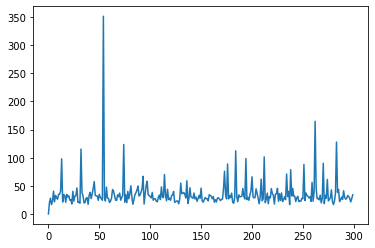

In [422]:
import matplotlib.pyplot as plt
plt.plot(arr)

In [423]:
min(arr[1:])

16.447322834645668

Проверьте вашу реализацию на задаче классификации. Подберите оптимальные гиперпараметры, чтобы получить accuracy > 0.83 **(не меняйте параметры сида)**.

In [11]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [12]:
np.random.seed(19052019)

randfor = RandomForest(n_estimators = 300, max_depth = 10, tasktype='classification', max_features='sqrt', random_state = 19052019)
randfor.fit(X_train, y_train)
y_pred = randfor.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

0.34265734265734266

## Градиентный бустинг своими руками (5 + 1 баллов)

Реализуйте алгоритм градиентного бустинга для регрессии. Напомним основные формулы.

Обозначим текущую композицию на $N-1$ шаге за $a_{N - 1}(x_i)$. Следующий базовый алгоритм $b_N(x_i)$ обучается на ответах $-\frac{\partial L(y_i, z)}{\partial z}\Bigl|_{z = a_{N - 1}(x_i)}$, где $L(y_i, z)$ — значение функции потерь на объекте при правильном ответе $y_i$ и предсказании $z$. Композиция на следующем шаге получается следующим образом:

$$
a_N(x_i) = a_{N-1}(x_i) + \nu\gamma_Nb_N(x_i)
$$

Здесь $\nu$ — гиперпараметр learning rate, $\gamma_N$ — оптимальный вес, настраиваемый на каждом шаге алгоритма, который можно найти по следующей формуле (обратите внимание на отсутствие $\nu$):

$$
\gamma_N = \mathrm{arg}\min_\gamma \frac{1}{\ell}\sum\limits_{i=1}^{\ell}L\left(y_i, a_{N - 1}(x_i) + \gamma b_N(x_i)\right)
$$

Можете принять $\gamma_N = 1$ для каждого $N$. Однако чтобы получить дополнительный 1 балл вам нужно реализовать нахождение оптимального $\gamma_N$ на каждом шаге.

В качестве функции потерь возьмите MSE (какая у него будет производная?).

*Примечание. Вы можете использовать `DecisionTree` из `sklearn` и методы оптимизации из различных библиотек.*

In [90]:
# это вам может помочь для поиска оптимальных гамма

from scipy.optimize import minimize

In [12]:
class GradientBoosting:
    def __init__(self, n_estimators, max_depth, learning_rate=0.1):
        """
        PARAMETERS:
        n_estimators - number of trees in the ensemble
        max_depth - maximum depth of a tree
        learning_rate - coefficient by which new algorithm result is multiplied
        """
        
        pass
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (k, d)
        y_train - np.array of shape (k,)
        """
        pass
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        return y_pred

Проверьте вашу реализацию. Подберите оптимальные гиперпараметры, чтобы получить MSE < 10 как в обычном случае, так и при нахождении оптимального шага **(не меняйте параметры сида)**.

In [13]:
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [14]:
np.random.seed(19052019)

# YOUR CODE HERE

In [34]:
mean_squared_error(y_test, y_pred)

9.431819650354331

Для удобства проверяющего укажите, пожалуйста, реализовали ли вы нахождение оптимального шага?

- Да / Нет

## Ансамблевые методы (10 баллов)

Сопровождайте код изображениями и комментариями. Не игнорируйте вопросы, ваши выводы тоже оцениваются. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше. Не забывайте подписывать графики и будет вам счастье!

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

**0. (0 баллов) ** Загрузите [датасет](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data), в нем вы найдете данные опрошенных женщин из индейского племени Пима. Будем решать задачу бинарной классификации: в колонке Outcome лежит метка наличия или отсутствия диабета - это наша целевая переменная. Есть ли пропущенные значения?

In [92]:
data = pd.read_csv('./diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**1. (0.5 балла)** Как вы думаете, является ли наличие нулей в некоторых колонках фактом того, что эти признаки имеют пропущенные значения? Замените нули на среднее значение признака там, где считаете это целесообразным.

In [94]:
np.sum(data.isna(), axis = 0)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Как видно из выдачи, в данных нет пропусков, и 0 - это именно числовые значения. Из имеющихся признаков логично предположить, что 0 будет являться содержательным значением для количества беременностей (Pregnancies). Однако для возраста, показателей концентрации глюкозы и инсулина в крови, SkinThickness, кровяного давления и индекса массы тела 0 - скорее всего пропуск, так как для человека эти значения не должны быть нулевыми. Проверим тип данных, чтобы определить, в каких столбцах близкие к нулю, но ненулевые значения (как, например, уровень инсулина) могли бть округленными.


In [95]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Мы видим, что для всех переменных, кроме BMI и DiabetesPedigreeFunction, тип данных - целые числа. Соответственно, если мы имеем дело, например, со значением уровня инсулина менее 0.5, то оно будет округлено в сторону нуля. Соответственно, мы не можем точно утверждать, что нулевые значения соответствуют пропущенным данным. Однако если посмотреть на средние значения показателей, то мы видим, что все они существенно отличаются от единицы. Более того, например, нижняя граница нормальных значений уровня глюкозы - около 59 (иначе человек просто потеряет сознание), и можно смело заявить, что в данных по уровню глюкозы 0 - это пропущенные значения. Таким образом, можно заменить на среднее все показатели, кроме Pregnancies и Outcome (является class variable, закодирован как 0 или 1), в которых стоит 0 (единственный показатель, для которого можно предположить близкие к нулю значения - Diabetes pedigree function со средним 0.47, однако он закодирован как float64, и потому в любом случае не будет округляться до 0). 

In [96]:
data = data.replace({'Glucose': 0, 'BloodPressure': 0, 'SkinThickness': 0, 'Insulin' : 0, 'BMI': 0, 'DiabetesPedigreeFunction': 0, 'Age': 0}, np.NaN)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [97]:
data = data.groupby(data.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


**2. (1 балл)** Визуализируйте распределение признаков по отдельности для больных диабетом и здоровых. Ваши графики должны быть примерно такими:

![Image](https://d.radikal.ru/d03/2005/f8/0ffb9443cbcf.png)

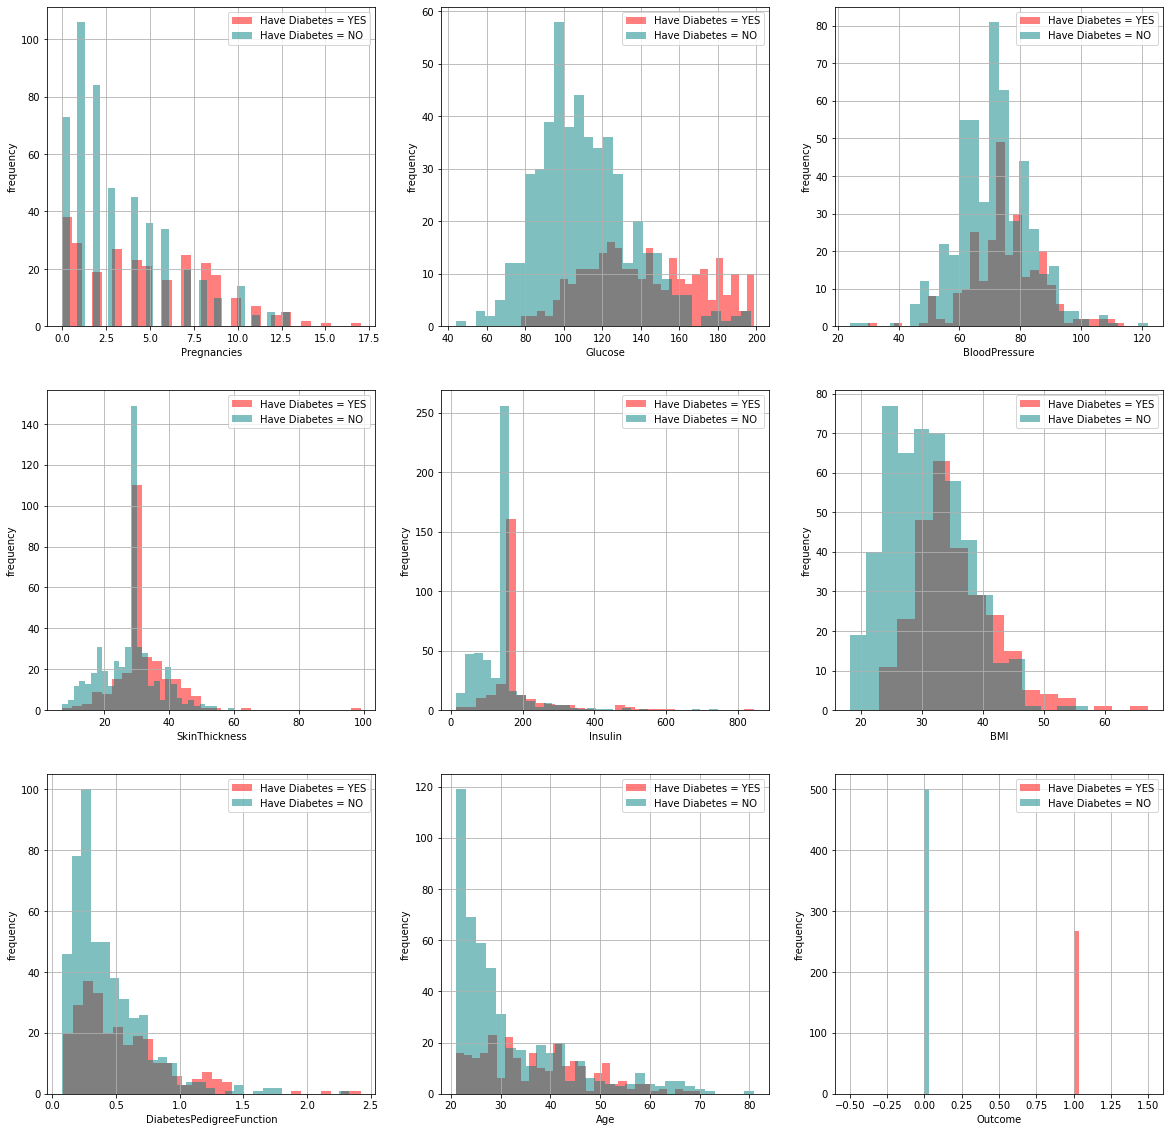

In [98]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 20))

# Pregnancies
x1 = data.loc[data.Outcome == 0, 'Pregnancies']
x2 = data.loc[data.Outcome == 1, 'Pregnancies']
axs[0,0].hist(x2, alpha=0.5, bins=30, color='red', label='Have Diabetes = YES')
axs[0,0].hist(x1, alpha=0.5, bins=30, color='teal', label='Have Diabetes = NO')
axs[0,0].set_xlabel('Pregnancies')
axs[0,0].set_ylabel('frequency')
axs[0,0].grid(True)
axs[0,0].legend()


# Glucose levels
x1 = data.loc[data.Outcome == 0, 'Glucose']
x2 = data.loc[data.Outcome == 1, 'Glucose']
axs[0,1].hist(x2, alpha=0.5, bins=30, color='red', label='Have Diabetes = YES')
axs[0,1].hist(x1, alpha=0.5, bins=30, color='teal', label='Have Diabetes = NO')
axs[0,1].set_xlabel('Glucose')
axs[0,1].set_ylabel('frequency')
axs[0,1].grid(True)
axs[0,1].legend()



# Blood pressure levels
x1 = data.loc[data.Outcome == 0, 'BloodPressure']
x2 = data.loc[data.Outcome == 1, 'BloodPressure']
axs[0,2].hist(x2, alpha=0.5, bins=30, color='red', label='Have Diabetes = YES')
axs[0,2].hist(x1, alpha=0.5, bins=30, color='teal', label='Have Diabetes = NO')
axs[0,2].set_xlabel('BloodPressure')
axs[0,2].set_ylabel('frequency')
axs[0,2].grid(True)
axs[0,2].legend()


# Skin triceps thickness
x1 = data.loc[data.Outcome == 0, 'SkinThickness']
x2 = data.loc[data.Outcome == 1, 'SkinThickness']
axs[1,0].hist(x2, alpha=0.5, bins=30, color='red', label='Have Diabetes = YES')
axs[1,0].hist(x1, alpha=0.5, bins=30, color='teal', label='Have Diabetes = NO')
axs[1,0].set_xlabel('SkinThickness')
axs[1,0].set_ylabel('frequency')
axs[1,0].grid(True)
axs[1,0].legend()



# Inculin levels
x1 = data.loc[data.Outcome == 0, 'Insulin']
x2 = data.loc[data.Outcome == 1, 'Insulin']
axs[1,1].hist(x2, alpha=0.5, bins=30, color='red', label='Have Diabetes = YES')
axs[1,1].hist(x1, alpha=0.5, bins=30, color='teal', label='Have Diabetes = NO')
axs[1,1].set_xlabel('Insulin')
axs[1,1].set_ylabel('frequency')
axs[1,1].grid(True)
axs[1,1].legend()



# BMI
x1 = data.loc[data.Outcome == 0, 'BMI']
x2 = data.loc[data.Outcome == 1, 'BMI']
axs[1,2].hist(x2, alpha=0.5, bins=15, color='red', label='Have Diabetes = YES')
axs[1,2].hist(x1, alpha=0.5, bins=15, color='teal', label='Have Diabetes = NO')
axs[1,2].set_xlabel('BMI')
axs[1,2].set_ylabel('frequency')
axs[1,2].grid(True)
axs[1,2].legend()



# DiabetesPedigreeFunction
x1 = data.loc[data.Outcome == 0, 'DiabetesPedigreeFunction']
x2 = data.loc[data.Outcome == 1, 'DiabetesPedigreeFunction']
axs[2,0].hist(x2, alpha=0.5, bins=30, color='red', label='Have Diabetes = YES')
axs[2,0].hist(x1, alpha=0.5, bins=30, color='teal', label='Have Diabetes = NO')
axs[2,0].set_xlabel('DiabetesPedigreeFunction')
axs[2,0].set_ylabel('frequency')
axs[2,0].grid(True)
axs[2,0].legend()

# Age
x1 = data.loc[data.Outcome==0, 'Age']
x2 = data.loc[data.Outcome==1, 'Age']
axs[2,1].hist(x2, alpha=0.5, bins=30, color='red', label='Have Diabetes = YES')
axs[2,1].hist(x1, alpha=0.5, bins=30, color='teal', label='Have Diabetes = NO')
axs[2,1].set_xlabel('Age')
axs[2,1].set_ylabel('frequency')
axs[2,1].grid(True)
axs[2,1].legend()


# Outcome frequency
x1 = data.loc[data.Outcome == 0, 'Outcome']
x2 = data.loc[data.Outcome == 1, 'Outcome']
axs[2,2].hist(x2, alpha=0.5, bins=30, color='red', label='Have Diabetes = YES')
axs[2,2].hist(x1, alpha=0.5, bins=30, color='teal', label='Have Diabetes = NO')
axs[2,2].set_xlabel('Outcome')
axs[2,2].set_ylabel('frequency')
axs[2,2].grid(True)
axs[2,2].legend()


**3. (2 балла)** Разбейте данные на обучающую и тестовую часть в соотношении 70:30. Обучите *BaggingClassifier* на деревьях (поставьте параметр *base_estimator = DecisionTreeClassifier()*) и *RandomForest*. Возьмите количество базовых алгоритмов, равное 10. Посчитайте accuracy, recall и precision. Есть ли какая-то разница между моделями и их результатами? Как вы думаете, почему получились такие результаты?

*tip: создайте отдельную функцию для вывода метрик качества;*

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

Разобьем выборку в заданном соотношении:

In [100]:
X = data.to_numpy()[:,:8]
y = data.to_numpy()[:,8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

Функция для вывода метрик качества: 

In [101]:
def metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    l = []
    l.append(accuracy)
    l.append(recall)
    l.append(precision)
    
    return print('accuracy:', accuracy, '     ',
                 'recall:', recall, '     ',
                 'precision:', precision)

In [102]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [103]:
bagging_clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(random_state=13), 
                            n_estimators=10, bootstrap=True, random_state=13)
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)

In [104]:
metrics(y_test, y_pred)

accuracy: 0.7272727272727273       recall: 0.4827586206896552       precision: 0.7


In [107]:
randfor_clf = RandomForestClassifier(n_estimators=10, random_state=13)
randfor_clf.fit(X_train, y_train)
y_pred = randfor_clf.predict(X_test)

In [108]:
metrics(y_test, y_pred)

accuracy: 0.7748917748917749       recall: 0.5862068965517241       precision: 0.7611940298507462


Мы видим, что метрики дают почти близкие результаты для precision и accuracy, однако можно заметить, что полнота увеличилась значительно. Это говорит о том, что RandomForestClassifier находит больше true-positive объектов, то есть полнее охватывает данные. Возможно, это связано с тем, что в случайном лесе учитывается оптимальное разбиение среди q случайных признаков, в то время как в процедуре бэггинга деревьев - только деревья на подмножествах.

**4. (2 балл)** Для случайного леса проанализируйте значение ROC-AUC на этих же данных в зависимости от изменения параметров:
* *n_estimators* (можно перебрать около 10 значений из отрезка от 10 до 1500)
* *min_samples_leaf* (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости ROC-AUC от этих параметров. Какие выводы можете сделать?

In [112]:
from sklearn.metrics import roc_auc_score

auc_roc_1 = np.zeros(1500)

for i in range(10,1500,50):
    randfor_clf_tree = RandomForestClassifier(n_estimators = i, min_samples_leaf = 1, random_state=13)
    randfor_clf_tree.fit(X_train, y_train)
    y_pred_randfor = randfor_clf_tree.predict(X_test)
    auc_roc_1[i] = roc_auc_score(y_test, y_pred_randfor)
    

In [113]:
print(auc_roc_1)

[0. 0. 0. ... 0. 0. 0.]


Text(0, 0.5, 'AUC-ROC score')

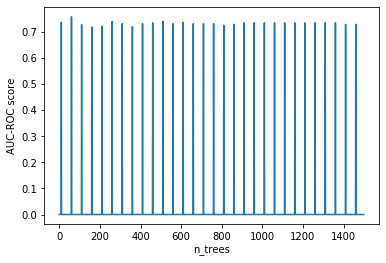

In [114]:
from sklearn.metrics import roc_curve, auc

plt.plot(auc_roc)
plt.xlabel('n_trees')
plt.ylabel('AUC-ROC score')

Мы видим, что примерно до количества деревьев = 500-600 значение AUC-ROC более вариативно, а затем стабилизируется. Таким образом, при условии, что параметр min_samples_leaf = 1, с вероятностью ~0.7 случайному лесу удастся разделить классы.

In [122]:
auc_roc_2 = np.zeros(40)

for i in range(1,40,3):
    randfor_clf_tree = RandomForestClassifier(n_estimators = 500, min_samples_leaf = i, random_state=13)
    randfor_clf_tree.fit(X_train, y_train)
    y_pred_randfor = randfor_clf_tree.predict(X_test)
    auc_roc_2[i] = roc_auc_score(y_test, y_pred_randfor)

In [123]:
print(auc_roc_2)

[0.         0.74102011 0.         0.         0.70653736 0.
 0.         0.7134818  0.         0.         0.7134818  0.
 0.         0.72497605 0.         0.         0.72497605 0.
 0.         0.72042625 0.         0.         0.71695402 0.
 0.         0.7112069  0.         0.         0.70893199 0.
 0.         0.70318487 0.         0.         0.70665709 0.
 0.         0.70090996 0.         0.        ]


Text(0, 0.5, 'AUC-ROC score')

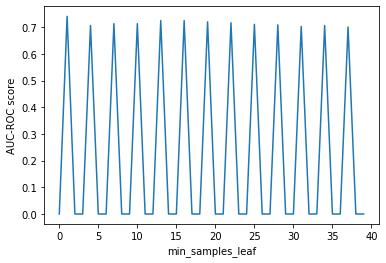

In [125]:
plt.plot(auc_roc_2)
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC-ROC score')

Мы видим, что вероятность того, что случайный лес верно разделит классы, чуть выше, если параметр min_samples_leaf =1, при условии, что деревьев 500.

**5. (1 балл)**. Посмотрите, оказались ли какие-то признаки более важными, чем остальные? Воспользуйтесь соответствующим аттрибутом случайного леса в библиотеке sklearn, чтобы построить barplot.

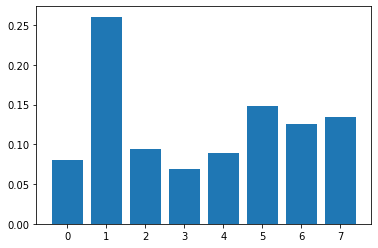

In [138]:
from matplotlib import pyplot

pyplot.bar(range(len(randfor_clf.feature_importances_)), randfor_clf.feature_importances_)
pyplot.show()

Мы видим, что наибольшее значение имеет признак 1 (Glucose) и чуть большую, чем остальные, значимость имеют признаки 5 (индекс массы тела), 6(комплексный показатель Pedigree) и 7(возраст). Таким образом, лучше всего предсказать диабет может именно завышенный показатель глюкозы в крови. Инуслин же, в свою очередь, менее значим, а значим возраст (!). 

**6. (2 балла)** Обучите HistGradientBoostingClassifier и GradientBoostingClassifier из sklearn. Опишите подробно, в чем заключается разница этих моделей. Подберите подходящее количество деревьев и проанализируйте метрики, с которыми мы работали выше.

In [139]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

gradboost_clf = GradientBoostingClassifier(n_estimators = 300, random_state = 13)

gradboost_clf.fit(X_train, y_train)
y_pred = gradboost_clf.predict(X_test)

In [140]:
metrics(y_pred, y_test)

accuracy: 0.7662337662337663       recall: 0.7037037037037037       precision: 0.6551724137931034


In [141]:
histgb_clf = HistGradientBoostingClassifier(max_iter = 500, random_state = 13)

histgb_clf.fit(X_train, y_train)
y_pred = histgb_clf.predict(X_test)

In [142]:
metrics(y_pred, y_test)

accuracy: 0.7402597402597403       recall: 0.684931506849315       precision: 0.5747126436781609


Видно, что GradientBoostingClassifier имеет лучшие метрики качества, и precision существенно отличается (при заданных параметрах). 

**7. (1.5 балла)** Вспомните, что представляет собой [стэкинг моделей](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier). Возьмите в качестве базовых моделей любой ансамблевый метод из тех, которые были использованы выше, и простой классфикатор из уже вами изученных на курсе. Как final_estimator используйте лог-регресссию. Посчитайте метрики для мета-классификатора. Улучшилось ли качество?

In [21]:
# Можете и сами обучить логистическую поверх ответов, а не использовать `StackingClassifier`

In [143]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [149]:
base_learners = [
    ('RF', RandomForestClassifier(n_estimators = 300, min_samples_leaf = 1, random_state=13)),
    ('KNN', KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30))]

meta_clf = StackingClassifier(estimators = base_learners, final_estimator = LogisticRegression())
     
meta_clf.fit(X_train, y_train)
y_pred = meta_clf.predict(X_test)

In [150]:
metrics(y_pred, y_test)

accuracy: 0.7619047619047619       recall: 0.7424242424242424       precision: 0.5632183908045977


Мета-классификатор смог значимо повысить полноту, однако при этом упала precision.

*tip: не забудьте завести список базовых алгоритмов*
<code>
base_learners = [
                 ('name1', model1(),
                 ('name2', model2())             
                ]

</code>